# MothPy

`mothpy` is a NumPy based implementation of moth-inspired navigation strategies that uses 
`pompy` library to create the puff, wind and concentration models. see `pompy/Readme.md` 
for details

### What is this repository for?

This Python package allows simulation moth-like navigators in dynamic 2D odour 
concentration fields spread in turbulent flows 

### Installation and requirements

    Python 2.7
    Numpy
    Scipy
    Matplotlib
    Pompy https://github.com/InsectRobotics/pompy 
    

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
# import pompy

### Example usage

``` 

    python compare_navigators_in_different_wind_conditions.py

```

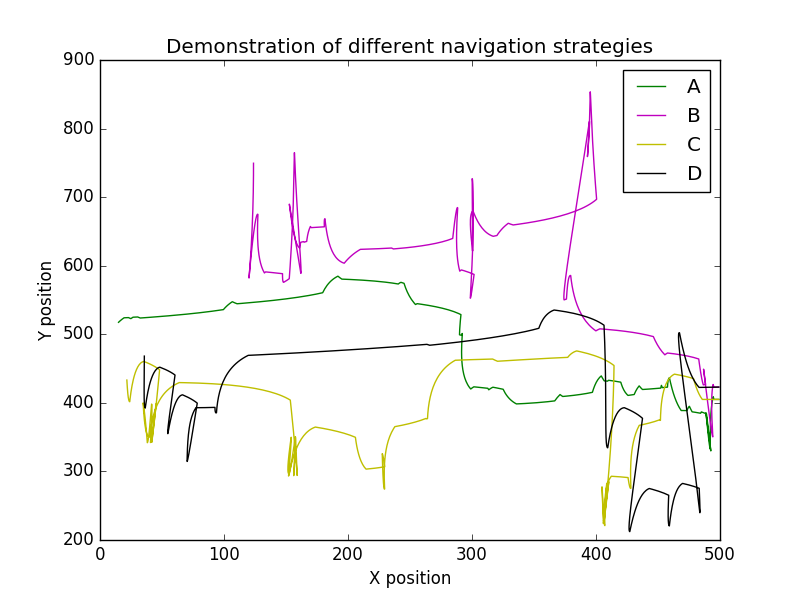

In [2]:
# demo of the output
Image('Demonstration_of_different_navigation_strategies.png')

## How to build the figures for the paper

#### Set up the navigators (optional) 
The file Casting_competition initiates the navigators to compete in the simulation. Four loops initiate four equal sized groups of navigators, their properties can be changed within these loops - navigation and casting strategies, location, and so on. 
For more information about navigators check out the models file. 
#### Set up the wind and plume conditions (optional) 
The file Compare_navigtors... initiates the main loop. For each iteration a new plume and wind model are initiated for the simulation to occur in. The function generate_job dictates the terms of the simulation in terms of wind and plume partameteres. In order to set the simulation enter the required parameters as input for generate_job. For example here - 
```
    for i in range(4):
        job_file_name = 'job'+ str(i)+ '.json'
        data_file_name = 'data'+ str(i)+ '.json'
        #titles_file_name = 'titles'+ str(i)+ '.json'       
        generate_job(char_time = 3.5, amplitude =0.1, job_file = job_file_name,
                     t_max =15, puff_release_rate = 100,
                     puff_spread_rate = 0.0001*(1+i),
                     dt = 0.01, num_it = 1)
```
The only value that changes is the puff spread rate, varying from 0.0001 to 0.0004.
Make sure that only one variable of the simulation changes with each iteration. Multivaribale changes will create problems later on. 

#### Run Comapare_navigators... 
When the file is run the wind and plume paramters that have been set are saved into "job" files, one JSON file for each iteration (job0.JSON, job1.JSON...). 
The trajectories of the navigators are saved as "data" files, (data0.JSON, data1.JSON), on which the later analyses will be made. 
Notice the following line - 
```
#save_plot(job_file_name,data_file_name,title,navigator_titles)
```
uncomment this line to save an image for each navigation attempt in the deafulat settings, that means 800 pictures). That could supply useful input in some cases. 

In [3]:
# %run compare_navigators_in_different_wind_conditions.py
# Run 4 jobs 
from Job_generator import generate_job
from Casting_competition import create_trajectory_data
from graphics_from_file import save_plot

for i in range(4):
    job_file_name = 'job'+ str(i)+ '.json'
    data_file_name = 'data'+ str(i)+ '.json'
    #titles_file_name = 'titles'+ str(i)+ '.json'       
    generate_job(char_time = 7, amplitude = 0.1, job_file = job_file_name,
                 t_max =20, puff_release_rate = 100,
                 puff_spread_rate = 0.0001*(1+i),
                 dt = 0.01, num_it = 1)
    navigator_titles = create_trajectory_data(job_file_name,data_file_name)
    title = 'loop ' +str(i) 
    save_plot(job_file_name,data_file_name,title,navigator_titles)
    #save_detection_plot(job_file_name,data_file_name,navigators_titles)
    print ('finished simulation number ' + str(i+1))

finished simulation number 1
finished simulation number 2
finished simulation number 3
finished simulation number 4


<Figure size 432x288 with 0 Axes>

#### Run Line_graphs 
The file `line_graphs.py` plots bar graphs of the four different simulations. It read from the Data and Job files, so those could be replaced and . There is no need to set up anything for this file, just run it:

``` python line_graphs.py ```


The output should look like the figures below.



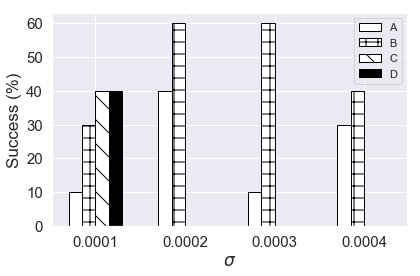

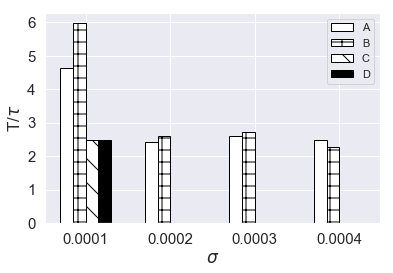

In [7]:
from line_graphs import *

num_jobs = 4
(xlabel,values)=process_jobs(num_jobs)
legends = ('A','B','C','D')
liberzonlist =[]
Benellilist = []
lfslist =[]
fslist = []
for i in range(num_jobs):
    loop = str(i)
    data_list = get_data('data'+loop+'.json',4)
    #print (data_list[0])
    liberzonlist.append(data_list[0])
    Benellilist.append((data_list[1]))
    lfslist.append((data_list[2]))
    fslist.append((data_list[3]))
#[succ_prec ,average_time_,average_efficiency]
lib_succ, lib_avg,lib_efficiency = zip(*liberzonlist)
Bene_succ, Bene_avg,Bene_efficiency = zip(*Benellilist)
lfs_succ, lfs_avg, lfs_efficiency = zip(*lfslist)
fs_succ, fs_avg,fs_efficiency = zip(*fslist)


fig,ax = plt.subplots()

n_groups = 4
bar_width = 0.3
opacity = 0.4
index = np.arange(0, 2*n_groups, 2)
"""
data0 =(lib_succ[0],Bene_succ[0],lfs_succ[0],fs_succ[0])
data1 =(lib_succ[1],Bene_succ[1],lfs_succ[1],fs_succ[1])
data2 =(lib_succ[2],Bene_succ[2],lfs_succ[2],fs_succ[2])
data3 =(lib_succ[3],Bene_succ[3],lfs_succ[3],fs_succ[3])
"""
def set_charts(data0,data1,data2,data3):
    global chart
    chart = plt.bar(index, data0, bar_width,color = 'white', edgecolor='black')
    chart = plt.bar(index+bar_width, data1, bar_width,color = 'white', hatch = '+' ,edgecolor='black')
    chart = plt.bar(index+2*bar_width, data2, bar_width,color = 'white', hatch = '\\', edgecolor='black')
    chart = plt.bar(index+3*bar_width, data3, bar_width,color = 'black', hatch = '*', edgecolor='black')
set_charts(lib_succ,Bene_succ,lfs_succ,fs_succ)
if xlabel == 'puff_spread_rate':
    ax.set_xlabel(r'$\sigma$')
else:
    ax.set_xlabel(xlabel)
ax.set_ylabel('Success (%)')
ax.xaxis.label.set_fontsize(17)
ax.yaxis.label.set_fontsize(17)
#ax.set_title('Success Percentage vs '+ xlabel)
plt.xticks(index+bar_width*1.5, (str(values[0]), str(values[1]), str(values[2]),str(values[3])))
plt.legend(legends)
plt.tight_layout()


plt.savefig('Success Percentage vs '+ xlabel)
plt.show()

#create second graph
fig,ax = plt.subplots()

n_groups = 4
bar_width = 0.3
opacity = 0.4
index = np.arange(0, 2*n_groups, 2)

#plt.xlabel(xlabel)
#plt.ylabel('Average Navigation Time (ratio)')
if xlabel == 'puff_spread_rate':
    ax.set_xlabel(r'$\sigma$')
else:
    ax.set_xlabel(xlabel)
ax.set_ylabel('T/'+r'$\tau$')


set_charts(lib_avg,Bene_avg,lfs_avg,fs_avg)
plt.subplots_adjust(bottom=0.15)
plt.xticks(index+bar_width*1.5, (str(values[0]), str(values[1]), str(values[2]),str(values[3])))
#ax.set_title('Average Navigation Time vs '+ xlabel)
ax.xaxis.label.set_fontsize(17)
ax.yaxis.label.set_fontsize(17)
plt.legend(legends)
plt.savefig('Average Navigation Time vs '+ xlabel)
plt.show()

## How to manage and design new navigators
### initiating  a navigator
Let us look at this example from the casting_competition file:
```
navigator1 = models.moth_modular(sim_region, cd['x_start'], cd['y_start'], cd['nav_type'] , cd['cast_type'], cd['wait_type'])
```
The navigator is initiated with it's initial x and y coordinates and the modes of navigating, casting and waiting. 
### wait, cast and nav types
A navigator is an object of the ```moth_modular``` class. It has an attribute to define each movement type, ```wait_type, cast_type, nav_type```. 
The attribute itself can be an integer or a string, it doesn't matter, but it should correlate to a signifier inside of the corresponding function. For example, let's look at the casting function -
```
def cast(self,wind_vel_at_pos):
        if self.state != 'cast' :
            #if this is the beginging of a new casting phase
            self.change_direction()
            
        if self.cast_type == 0:
            self.u=0
            self.v=0
            
        if self.cast_type == 1:
            self.calculate_wind_angle(wind_vel_at_pos)
            self.u = -self.speed*np.cos(self.gamma+self.wind_angle)
            self.v = self.speed*np.sin(self.gamma+self.wind_angle)

        if self.cast_type == 2:
            #define different betas for different casting patterns
            self.cast2(wind_vel_at_pos)
```
The function, like all movement functions, takes as input the parameters of the navigator and the wind velocity at the position (as calculated by the wind model).
The first conditional changes the direction of casting from the previous direction. This has nothing to with the cast type. 
The second, third and fourth conditionals are dependant on the cast type, and use it as an indicator as to how to move. Note that the function can call upon other functions. The stracture of the ```wait``` and ```navigate``` are very similar - The function sets the velocity (u,v) of the navigator. The actual time step is performed in the update function.
#### defining new movement types
In order to create a new waiting, casting or navigation, first enter the models file. For example, let's say we would like to design a new waiting mode. First, we sould define a condition within the waiting function. 
```
    def wait(self,wind_vel_at_pos):
        if wait_type == 'example wait type':
```
Now, if the navigator was initiated to so its wait type attribute is 'example wait type' the wait function will be directed into the actions we define under that conditional. Secondly, define the changes in you would like to be made to the velocity of the navigator:
```
    def wait(self,wind_vel_at_pos):
        if wait_type == 'example wait type':
            u *= 1.1
            v *= 1.1
```
The same approach should be applied to any of the movement functions. 
After we defined the new conditional, we can use it when initiatin a new navigator:

```
navigator1 = models.moth_modular(sim_region, cd['x_start'], cd['y_start'], cd['nav_type'] , cd['cast_type'], 'example wait type')
```
